

************************tableau avant le tri ***************************************


[176405  45878 541196 ... 199719 552688 387491]


************************tableau aprés tri***************************************


[   297    687    720 ... 585220 585239 585506]


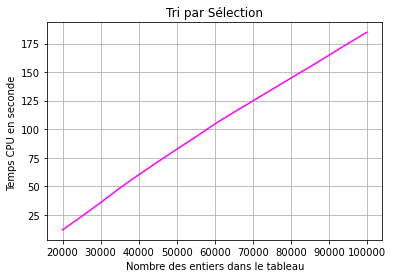

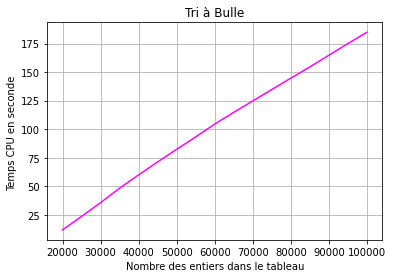

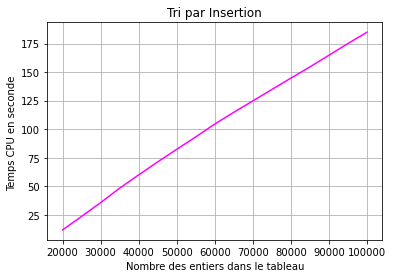

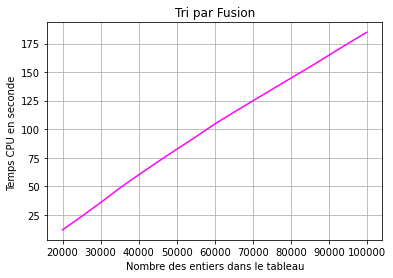

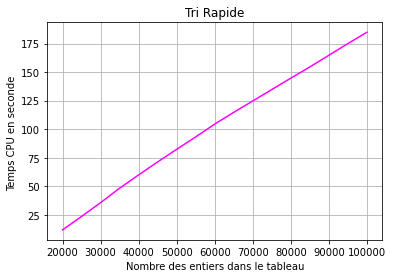

************************temps d'exétion  de tri selection ***************************************
temps d'exétion  de tri selection
11.769607
23.565623
35.628391
48.308392
59.956121
71.320659
82.367431
93.208719
104.485237
114.747976
124.725037
134.722642
144.677363
154.495374
164.728246
174.98591
184.913227
************************temps d'exétion  de tri à bulle***************************************
temps d'exétion  de tri à bulle
11.771706
23.565623
35.634969
48.316435
59.956121
71.320659
82.377459
93.208719
104.485237
114.747976
124.735073
134.730658
144.679375
154.495374
164.738272
174.98591
184.913227
************************temps d'exétion de tri par Isertion***************************************
temps d'exétion  de tri par Isertion
11.783602
23.575654
35.638477
48.318503
59.964134
71.330702
82.377459
93.218747
104.485237
114.758001
124.743087
134.73267
144.687389
154.505413
164.738272
174.995942
184.923251
************************temps d'exétion  de tri par fusion*************

In [2]:
#importation des bibliothéques

from numpy import random as rd
from datetime import *
import matplotlib.pyplot as plt

#******************************************************
#Décalaration des variables

start = datetime.now()
tmp_s = []
tmp_b = []
tmp_i = []
tmp_f = []
tmp_r = []
numT =  []

#******************************************************
#Algorithme de tri par Séléction

def triSelection(v):
    for i in range(len(v)):
        ind_min = i
        for k in range(i+1,len(v)):
            if (v[k] < v[ind_min]):
                ind_min = k
        aux = v[i]
        v[i]= v[ind_min]
        v[ind_min]=aux
    
    end = datetime.now()
    diff = end-start
    sec = diff.total_seconds()
    tmp_s.append(sec)
    
#******************************************************
#Algorithme de tri à Bulle

def triBulle (v):
    permut = True
    p=len(v)-1
    while (permut):
        permut=False
        for i in range(0,p):
            if (v[i] > v[i+1]):
                aux=v[i]
                v[i]=v[i+1]
                v[i+1]=aux
                permut=True
        p-=1
    
    end = datetime.now()
    diff = end-start
    sec = diff.total_seconds()
    tmp_b.append(sec)
    
#******************************************************
#Algorithme de tri par Insertion

def triInsertion (v):
    p=len(v)-1
    for i in range(0,p) :
        x = v[i+1]
        j=i
        while((v[j] > x ) and (j>=0) ) :
            v[j+1] = v[j]
            j-= 1
        v[j+1] = x

    end = datetime.now()
    diff = end-start
    sec = diff.total_seconds()
    tmp_i.append(sec)
    
#******************************************************
#Algorithme de tri par Fusion

def TriFusion(w):
    def triFusion(v):
        if len(v)>1:
            mid = len(v)//2
            left = v[:mid]
            right = v[mid:]
            triFusion(left)
            triFusion(right)
            i=0
            j=0
            k=0
            while i < len(left) and j < len(right):
                if left[i] <= right[j]:
                    v[k]=left[i]
                    i=i+1
                else:
                    v[k]=right[j]
                    j=j+1
                k=k+1
            while i < len(left):
                v[k]=left[i]
                i=i+1
                k=k+1
            while j < len(right):
                v[k]=right[j]
                j=j+1
                k=k+1
    end = datetime.now()
    diff = end-start
    sec = diff.total_seconds()
    tmp_f.append(float(sec))
    
#******************************************************
#Algorithme de tri par Rapide

def TriRapide(v,fin,debut=0):
    def triRapide(v,fin,debut=0):

        def division(v, debut, fin):
            i = (debut-1) 
            pivot = v[fin] 

            for j in range(debut, fin):

                if v[j] <= pivot:

                    i = i+1
                    v[i], v[j] = v[j], v[i]

            v[i+1], v[fin] = v[fin], v[i+1]
            return (i+1)
            
        if len(v) == 1:
            return v
        if debut < fin:
            pivot = division(v, debut, fin)
            triRapide(v, debut, pivot-1)
            triRapide(v, pivot+1, fin)
    end = datetime.now()
    diff = end-start
    sec = diff.total_seconds()
    tmp_r.append(sec)

# test des algorithmes 

a=20000
b=100000
n=5000

print()
print()
print("************************tableau avant le tri ***************************************")
print()
print()

T=rd.randint(585595, size=(n))
print(T)

for i in range(a, b+1, n):
   
    numT.append(i)
    triSelection(T)
    triBulle (T)
    triInsertion(T)
    TriFusion(T)
    TriRapide(T,n)
print()
print()    
print("************************tableau aprés tri***************************************")
print()
print()
print(T)

#******************************************************
# la  courbe de tri par sélection

plt.figure()
plt.plot(numT,tmp_s,"magenta")
plt.title("Tri par Sélection")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.grid()

#******************************************************
# la  courbe de tri à Bulle

plt.figure()
plt.plot(numT,tmp_b,"magenta")
plt.title("Tri à Bulle")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.grid()
#******************************************************
# la  courbe de tri par Insertion

plt.figure()
plt.plot(numT,tmp_i,"magenta")
plt.title("Tri par Insertion")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.grid()

#******************************************************
# la  courbe de tri par Fusion

plt.figure()
plt.plot(numT,tmp_f,"magenta")
plt.title("Tri par Fusion")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.grid()

#******************************************************
# la  courbe de Tri Rapide

plt.figure()
plt.plot(numT,tmp_r,"magenta")
plt.title("Tri Rapide")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.grid()

plt.show()
print("************************temps d'exétion  de tri selection ***************************************")

print("temps d'exétion  de tri selection")
for i in range (len(tmp_s)) :
    print (tmp_s[i])
print("************************temps d'exétion  de tri à bulle***************************************")

print("temps d'exétion  de tri à bulle")
for i in range (len(tmp_b)):
    print (tmp_b[i])
print("************************temps d'exétion de tri par Isertion***************************************")

print("temps d'exétion  de tri par Isertion")
for i in range (len(tmp_i)):
    print (tmp_i[i])
print("************************temps d'exétion  de tri par fusion***************************************")

print("temps d'exétion  de tri par fusion")
for i in range (len(tmp_f)):
    print (tmp_f[i])
print("************************temps d'exétion  de tri rapide***************************************")
print("temps d'exétion  de tri rapide")
for i in range (len(tmp_r)):
    print (tmp_r[i])
print("************************tableau nombre des entiers N***************************************")
print(" tableau nombre des entiers N")
for i in range (len(numT)):
    print (numT[i])